In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import prep
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import math

In [8]:
df = prep.get_stores_data()

In [9]:
df.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2,9.24


In [10]:
df2 = df.sale_amount.resample("D").sum().reset_index()
X = df2.sale_date
y = df2.sale_amount

In [21]:
tss = TimeSeriesSplit(n_splits=5,max_train_size=None)
for train_index,test_index in tss.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    #print(len(X_train))
    print(len(y_test))

304
304
304
304
304


In [16]:
X_train.head()

0   2013-01-01 00:00:00+00:00
1   2013-01-02 00:00:00+00:00
2   2013-01-03 00:00:00+00:00
3   2013-01-04 00:00:00+00:00
4   2013-01-05 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]

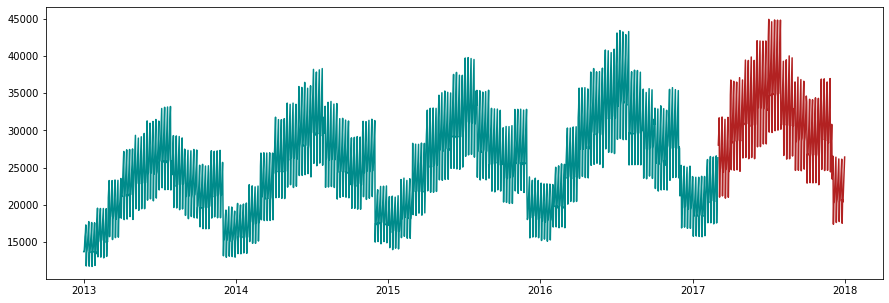

In [205]:
plt.figure(figsize=(15,5))
plt.plot(X_train,y_train,c='darkcyan')
plt.plot(X_test,y_test,c='firebrick')
plt.show()

In [29]:
sales_by_week = df.resample('W')[['sales_total']].mean()

In [174]:
sales_by_week.head(2)

,sales_total
sale_date,
2013-01-06 00:00:00+00:00,163.589167
2013-01-13 00:00:00+00:00,159.981203


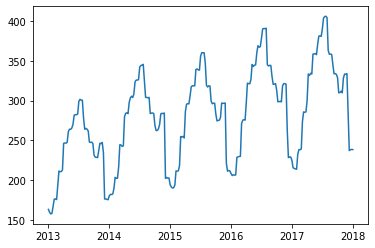

In [30]:
#plot sales by week
plt.plot(sales_by_week)

In [32]:
df.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2,9.24


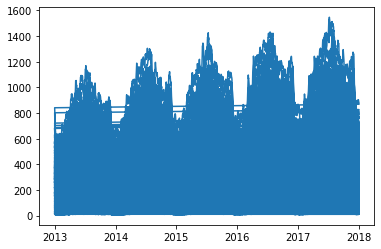

In [34]:
#rolling weekly average
plt.plot(df.sales_total.rolling(window=7).mean())

In [36]:
weekly_rolling = df.sales_total.rolling(window=7).mean()

In [41]:
plt.plot(weekly)

,item,sale_amount,sale_id,store,store_zipcode,item_price,item_upc12,item_upc14,month,weekday
sales_total,,,,,,,,,,
7.56,1.0,9.0,9.0,1.0,78253.0,0.84,3.520026e+10,3.520026e+10,1.0,2.0
8.40,1.0,10.0,6.0,1.0,78253.0,0.84,3.520026e+10,3.520026e+10,1.0,2.5
9.24,1.0,11.0,2.0,1.0,78253.0,0.84,3.520026e+10,3.520026e+10,1.0,2.0
10.08,1.0,12.0,7.5,1.0,78253.0,0.84,3.520026e+10,3.520026e+10,1.0,4.0
10.92,1.0,13.0,2.5,1.0,78253.0,0.84,3.520026e+10,3.520026e+10,1.0,2.5
11.76,1.0,14.0,3.0,1.0,78253.0,0.84,3.520026e+10,3.520026e+10,1.0,3.0


In [49]:
X_train.head()

0   2013-01-01 00:00:00+00:00
1   2013-01-02 00:00:00+00:00
2   2013-01-03 00:00:00+00:00
3   2013-01-04 00:00:00+00:00
4   2013-01-05 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]

In [50]:
df.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2,9.24


In [52]:
train = df[:'2016'].sale_amount.resample('D').agg(sum)
test = df['2017':].sale_amount.resample('D').agg(sum)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


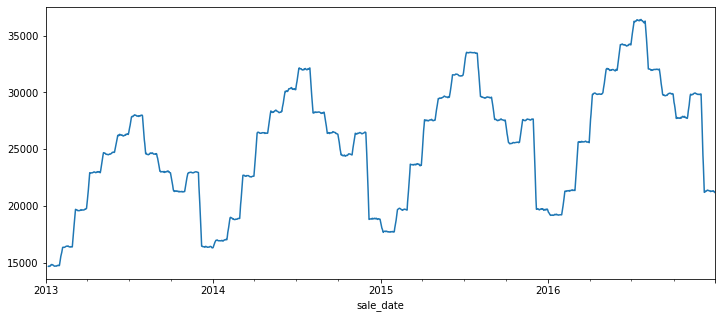

In [54]:
train.rolling(7).mean().plot(figsize=(12,5))
plt.show()

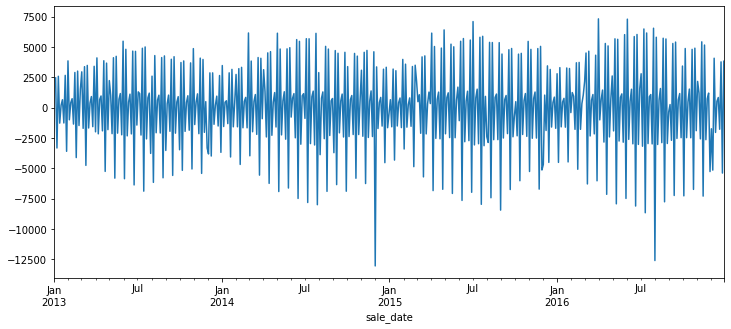

In [59]:
train.resample('3D').mean().diff(periods=1).plot(figsize=(12,5))

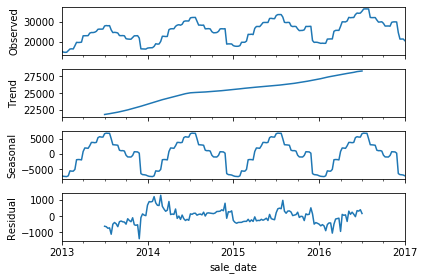

In [64]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').mean(),model='additive')

fig = decomposition.plot()
plt.show()

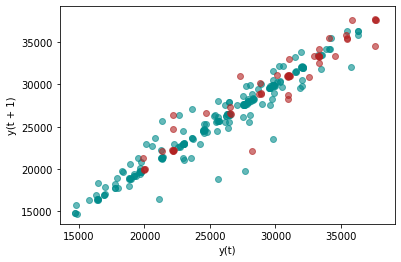

In [234]:
pd.plotting.lag_plot(train.resample('7D').mean(),lag=1,c='darkcyan',alpha=.6)
pd.plotting.lag_plot(test.resample('7D').mean(),lag=1,c='firebrick',alpha=.6)

In [233]:
df_corr = pd.concat([train.shift(7),train],axis=1)
df_corr.columns = ['t-7','t+7']
result = df_corr.corr()
print(result)

          t-7       t+7
t-7  1.000000  0.965467
t+7  0.965467  1.000000


In [240]:
df = pd.read_csv('german.csv')

In [241]:
df.Date = pd.to_datetime(df.Date)

In [242]:
df.set_index('Date',inplace=True)

In [243]:
ts_data = df.Consumption.resample('D').agg(sum)

In [244]:
train_size = int(len(ts_data) * .65)
train1,test1 = ts_data[0:train_size],ts_data[train_size:len(ts_data)]

In [245]:
len(ts_data)
train1 = pd.DataFrame(train1)

In [246]:
len(train1)

2848

In [247]:
len(test1)

1535

In [248]:
print(train1.head(1))
test1.head(1)

            Consumption
Date                   
2006-01-01     1069.184


Date
2013-10-19    1161.249
Freq: D, Name: Consumption, dtype: float64

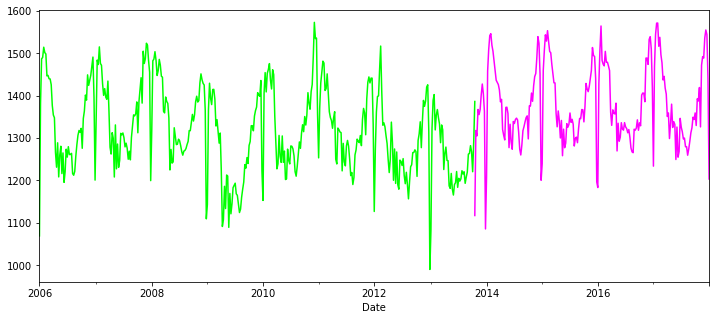

In [249]:
train1.Consumption.resample('W').mean().plot(figsize=(12,5),c='lime')
test1.resample('W').mean().plot(figsize=(12,5),c='fuchsia')
plt.show()

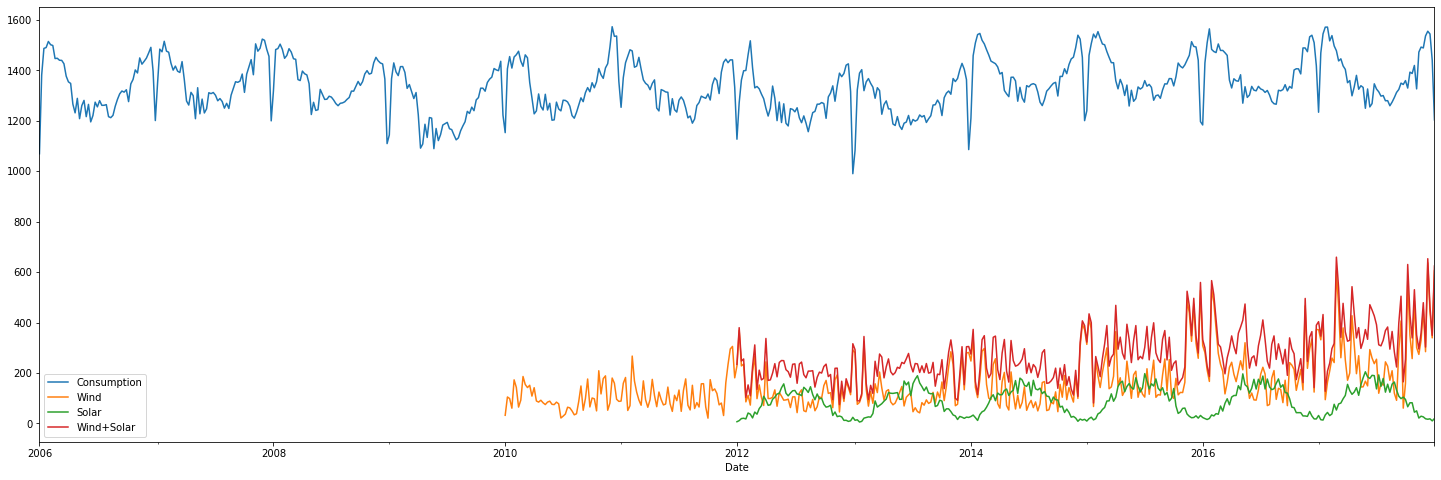

In [257]:
df.resample('W').mean().plot(figsize=(25,8))
plt.show()

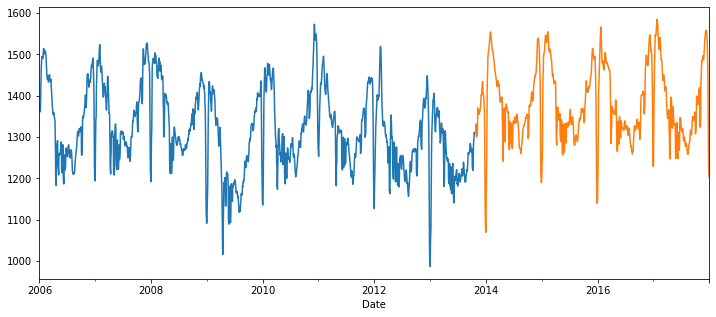

In [193]:
train1.Consumption.rolling(7).mean().plot(figsize=(12,5))
test1.rolling(7).mean().plot(figsize=(12,5))
plt.show()

In [170]:
train1['month'] = train1.index.month

In [171]:
train1.head(2)

,Consumption,month
Date,,
2006-01-01,1069.184,1
2006-01-02,1380.521,1


In [179]:
avg_by_month = train1.groupby('month').mean()

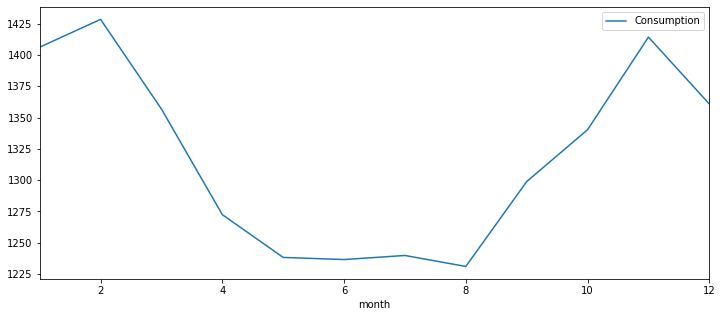

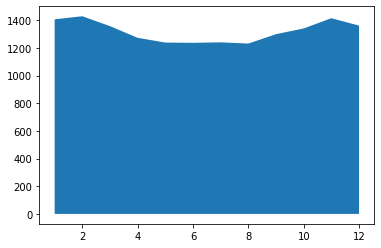

In [276]:
x = avg_by_month.index
y = avg_by_month.Consumption
avg_by_month.plot(figsize=(12,5))
plt.show()
plt.stackplot(x,y)
plt.show()

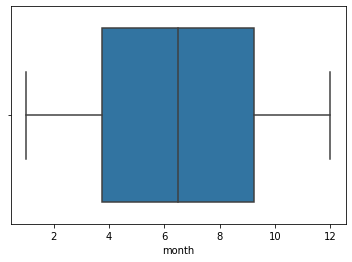

In [266]:
import seaborn as sns
month = avg_by_month.index
sns.boxplot(data=avg_by_month,y='Consumption',x=month)


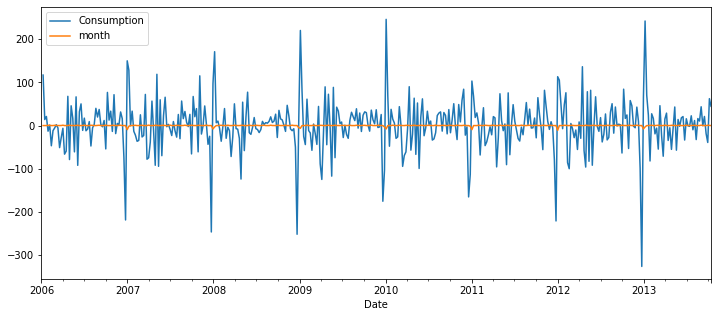

In [183]:
train1.resample('7D').mean().diff(periods=1).plot(figsize=(12,5))

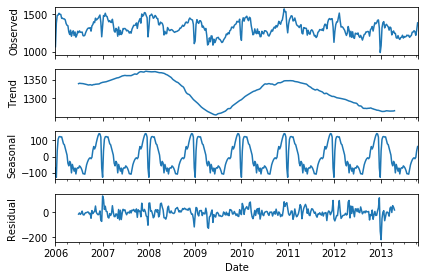

In [210]:
decomposition = sm.tsa.seasonal_decompose(train1.Consumption.resample('W').mean(),model='additive')

fig = decomposition.plot()
plt.show()

In [188]:
df = prep.get_stores_data()

In [225]:
df.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2,9.24


In [232]:
pd.DataFrame(df.groupby(['item_name']).sale_amount.sum())

,sale_amount
item_name,
Ahold Cocoa Almonds,1337133.0
Amys Light & Lean Spaghetti Italiano,534094.0
Back To Nature Gluten Free White Cheddar Rice Thin Crackers,335230.0
Barefoot Pinot Grigio 187,803107.0
Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,401781.0
Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk,1469971.0
Boars Head Sliced White American Cheese - 120 Ct,401907.0
Burts Bees Daily Moisturizing Cream Sensitive,468480.0
Careone Family Comb Set - 8 Ct,736892.0
